# Health Financing in Uganda

## Preliminary notes on analysis

The following analysis makes use of various documents from several sources, particularly:
* From the [Government of Uganda Budget website](http://budget.go.ug)
* * [Ugandan Draft Budget Estimates for 2015-16 Volume 1]
* * [Ugandan Draft Budget Estimates for 2015-16 Volume 2]
* * [Ugandan Approved Budget Estimates for 2013-14  Volume 1]

Volume 2 of the Budget Estimates for 2013-14 or previous years has not been made available by the Ugandan Government, and so only bulk figures for disbursements to Local Government Areas have been used.

This analysis focuses primarily on an nalysis of Givernment and Government-aware spending on health in Uganda, and does not take into account private spending on health, on which no information is available. This is a significant drawback, as significant corruption has been documented in the Ugandan health system. This imposes an additional cost directly to the Ugandan Health Consumer, not sanctioned by the official health system.

In all analysis, Appropriations-In-Aid have been considered to be disbursements from sources internal to Uganda, and have not been separated from Ugandan Government spending on health.

Data from these documents was extracted by hand into a data file, which is available [here](https://raw.githubusercontent.com/forsakendaemon/uganda/master/health_budget.csv). A second data file analysing program spending external to the Government of Uganda is available [here](https://raw.githubusercontent.com/forsakendaemon/uganda/master/aid_funding.csv), which has been used for part of the analysis.

All documents and source files are available publically on [GitHub](https://github.com/forsakendaemon/uganda).

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

health_budget = pd.read_csv('health_budget.csv', comment='#')
aid_funding = pd.read_csv('aid_funding.csv', comment='#')

## Primary Areas of Health Spending

The largest areas of central health spending in Uganda are Pharmaceutical and Medical Supplies, and Primary Healthcare, with a significant amount of spending going towards Health Systems Development.

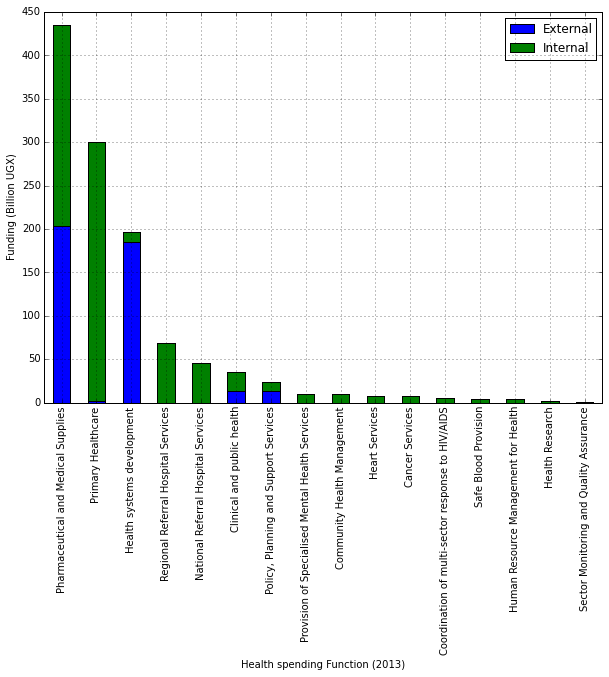

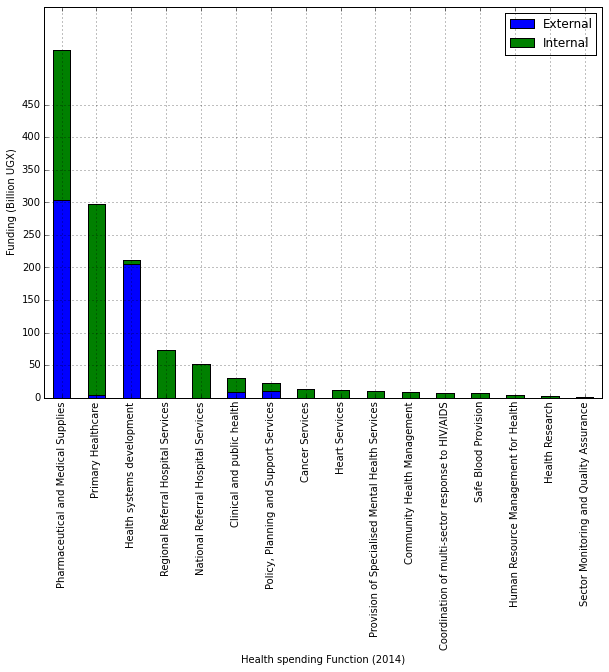

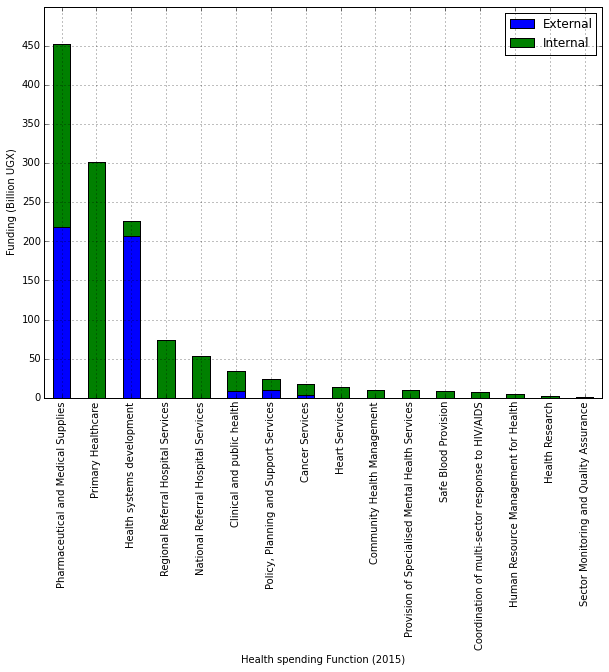

In [146]:
health_budget_by_internal13 = health_budget[health_budget["Year"] == "13/14"].groupby(['Function', 'Internal']).aggregate(np.sum).unstack().fillna(0)
health_budget_by_internal13['sum'] = health_budget_by_internal13.Amount.External + health_budget_by_internal13.Amount.Internal
health_budget_by_internal13 = health_budget_by_internal13.sort(columns=['sum'], ascending=False)
health_budget_by_internal13 = health_budget_by_internal13.drop("sum", axis=1)
plot13 = health_budget_by_internal13.plot(kind='bar', stacked=True, figsize=(10, 7))
plot13.set_xlabel("Health spending Function (2013)")
plot13.set_yticks(np.arange(0,500000000, 50000000))
plot13.set_yticklabels(np.arange(0,500, 50))
plot13.set_ylabel("Funding (Billion UGX)")
plot13.legend(["External", "Internal"])

health_budget_by_internal14 = health_budget[health_budget["Year"] == "14/15"].groupby(['Function', 'Internal']).aggregate(np.sum).unstack().fillna(0)
health_budget_by_internal14['sum'] = health_budget_by_internal14.Amount.External + health_budget_by_internal14.Amount.Internal
health_budget_by_internal14 = health_budget_by_internal14.sort(columns=['sum'], ascending=False)
health_budget_by_internal14 = health_budget_by_internal14.drop("sum", axis=1)
plot14 = health_budget_by_internal14.plot(kind='bar', stacked=True, figsize=(10, 7))
plot14.set_xlabel("Health spending Function (2014)")
plot14.set_yticks(np.arange(0,500000000, 50000000))
plot14.set_yticklabels(np.arange(0,500, 50))
plot14.set_ylabel("Funding (Billion UGX)")
plot14.legend(["External", "Internal"])

health_budget_by_internal15 = health_budget[health_budget["Year"] == "15/16"].groupby(['Function', 'Internal']).aggregate(np.sum).unstack().fillna(0)
health_budget_by_internal15['sum'] = health_budget_by_internal15.Amount.External + health_budget_by_internal15.Amount.Internal
health_budget_by_internal15 = health_budget_by_internal15.sort(columns=['sum'], ascending=False)
health_budget_by_internal15 = health_budget_by_internal15.drop("sum", axis=1)
plot15 = health_budget_by_internal15.plot(kind='bar', stacked=True, figsize=(10, 7))
plot15.set_xlabel("Health spending Function (2015)")
plot15.set_yticks(np.arange(0,500000000, 50000000))
plot15.set_yticklabels(np.arange(0,500, 50))
plot15.set_ylabel("Funding (Billion UGX)")
plot15.legend(["External", "Internal"])

Pharmaceuticals and Medical Supplies are partially purchased through the [National Medical Stores](http://www.nms.go.ug), a statutory corporation which supplies medicines and medical supplies across Uganda.

The remainder of the funding for Pharmaceuticals and Medical Supplies is supplied directly through the central Ugandan Department of Health, to deliver programs funded and organised by the [Global Fund to fight AIDS, Tuberculosis, and Malaria](http://www.theglobalfund.org), and the [Gavi, the Vaccine Alliance](http://www.gavi.org).

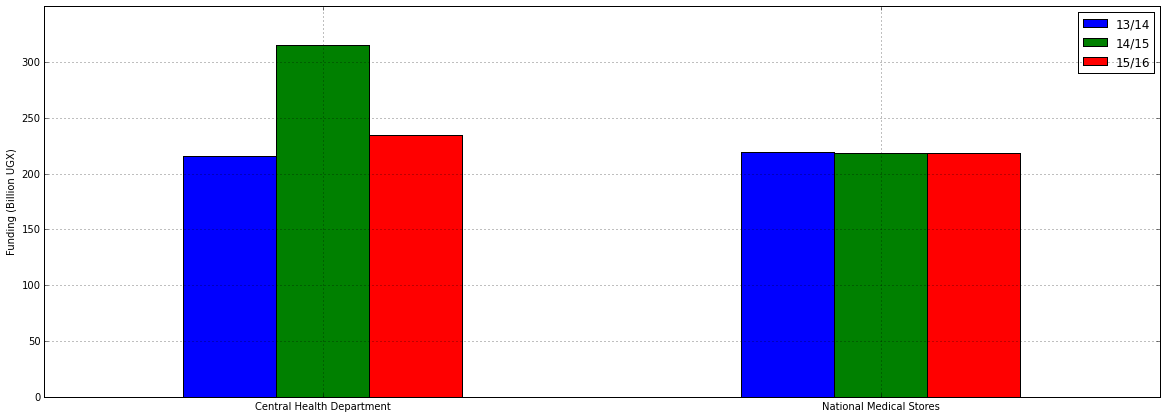

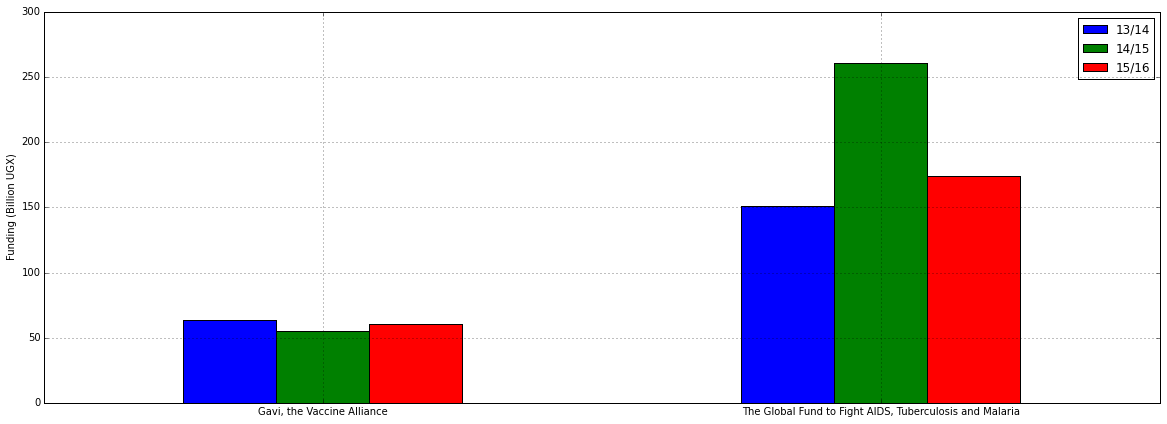

In [151]:
plotpmso = health_budget[health_budget['Function'] == "Pharmaceutical and Medical Supplies"].groupby(['Organisation','Year']).aggregate(np.sum).unstack().fillna(0).plot(kind="bar", figsize=(20,7))
plotpmso.set_xlabel("")
plotpmso.set_xticklabels(["Central Health Department", "National Medical Stores"], rotation='horizontal')
plotpmso.set_yticks(np.arange(0,350000000, 50000000))
plotpmso.set_yticklabels(np.arange(0,350, 50))
plotpmso.set_ylabel("Funding (Billion UGX)")
plotpmso.legend(["13/14", "14/15", "15/16"])
plotpmsc = health_budget[(health_budget['Function'] == "Pharmaceutical and Medical Supplies") & (health_budget['Organisation'] != "National Medical Stores")].groupby(['Item','Year']).aggregate(np.sum).unstack().fillna(0).plot(kind="bar", figsize=(20,7))
plotpmsc.set_xlabel("")
plotpmsc.set_xticklabels(["Gavi, the Vaccine Alliance", "The Global Fund to Fight AIDS, Tuberculosis and Malaria"], rotation='horizontal')
plotpmsc.set_yticks(np.arange(0,350000000, 50000000))
plotpmsc.set_yticklabels(np.arange(0,350, 50))
plotpmsc.set_ylabel("Funding (Billion UGX)")
plotpmsc.legend(["13/14", "14/15", "15/16"])

In the area of Health Systems Development, most funding goes to programs designed to strengthen the health system. Much of this money (3,000,000,000 UGX, or approximately 60%) is external funding going towards scholarships and related costs, such as the [Belgian scholarship program](http://health.go.ug/docs/scholarships_BTC.pdf), which aimed to train Ugandans, primarily in Health to a Masters degree level.

Significant funding has also been put towards improving facilities at [Mulago National Referring Hospital](http://mulago.or.ug), the largest hospital in Uganda and one of the three National Referral Hospitals. Major renovations commenced at Mulago National Referring Hospital [commenced in 2014](http://www.monitor.co.ug/News/National/Mulago-hospital-renovation-starts/-/688334/2481588/-/item/1/-/13ye8mb/-/index.html) and aim to increase capacity significantly, and were begun with the assistance of the [African Development Bank](http://www.afdb.org/en/).

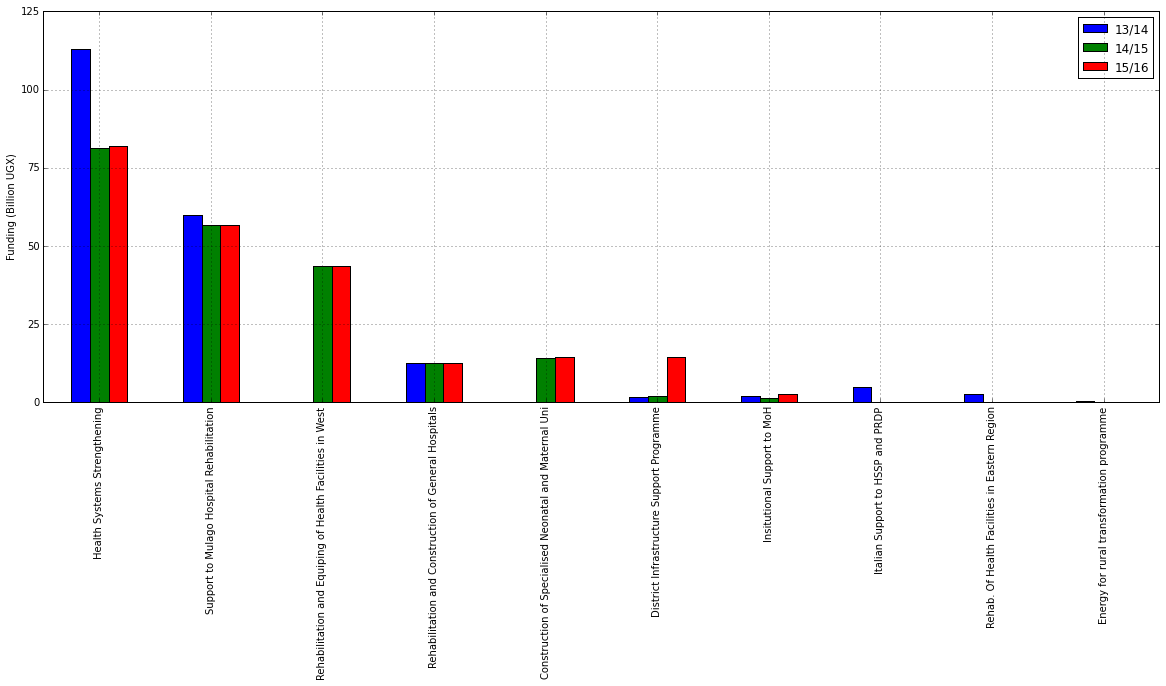

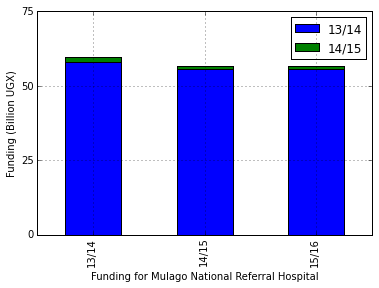

In [176]:
health_budget_hsd = health_budget[health_budget['Function'] == "Health systems development"].groupby(['Item','Year']).aggregate(np.sum).unstack().fillna(0)
health_budget_hsd['sum'] = health_budget_hsd.Amount['13/14'] + health_budget_hsd.Amount['14/15'] + health_budget_hsd.Amount['15/16']
health_budget_hsd = health_budget_hsd.sort(columns=['sum'], ascending=False)
health_budget_hsd = health_budget_hsd.drop("sum", axis=1)
plothbhsd = health_budget_hsd.plot(kind="bar", figsize=(20,7))
plothbhsd.set_yticks(np.arange(0,150*1e6, 25*1e6))
plothbhsd.set_yticklabels(np.arange(0,150, 25))
plothbhsd.set_ylabel("Funding (Billion UGX)")
plothbhsd.set_xlabel('')
plothbhsd.legend(["13/14", "14/15", "15/16"])

health_budget_mulago = health_budget[health_budget['Item'] == 'Support to Mulago Hospital Rehabilitation']
plothbm = health_budget_mulago.groupby(['Year', 'Internal']).aggregate(np.sum).unstack().plot(kind="bar", stacked=True)
plothbm.set_yticks(np.arange(0,100000000, 25000000))
plothbm.set_yticklabels(np.arange(0,100, 25))
plothbm.set_ylabel("Funding (Billion UGX)")
plothbm.set_xlabel('Funding for Mulago National Referral Hospital')
plothbm.legend(["13/14", "14/15", "15/16"])

Uganda's health system is primarily funded by The Government of Uganda. However, more than 35% of funding for health programmes comes from external sources, primarily 

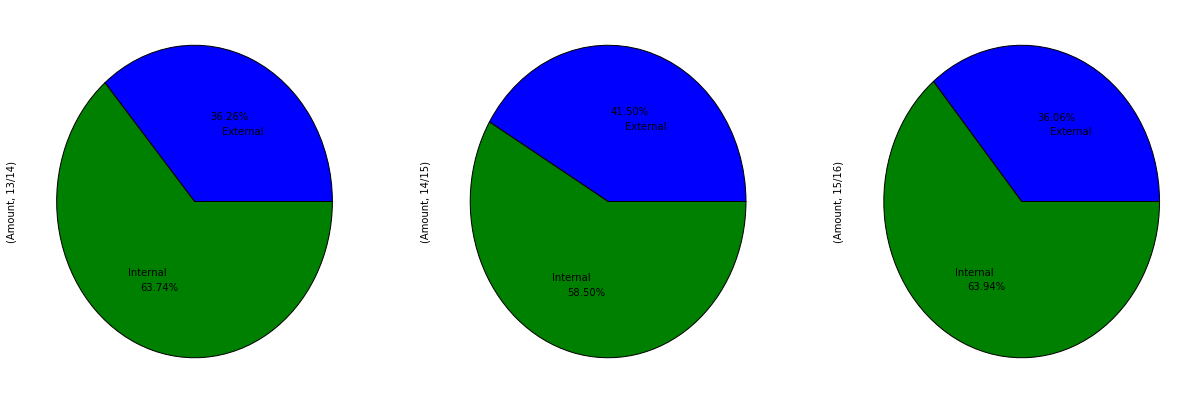

In [182]:
plothbie = health_budget[["Year", "Internal", "Amount"]].groupby(["Internal", "Year"]).aggregate(np.sum).unstack().plot(kind='pie', subplots=True, figsize=(21, 7), labeldistance=0.5, legend=False, autopct='%.2f%%',)

The Government of Uganda entirely or mostly funds most major domains of health spending. However, the majority of funding in the areas on Health Systems Development comes from sources external to the Government, and significant amount of funding in the areas of Pharmaceutical and Medical Supplies and Policy, Planning and Support Services comes from external sources.

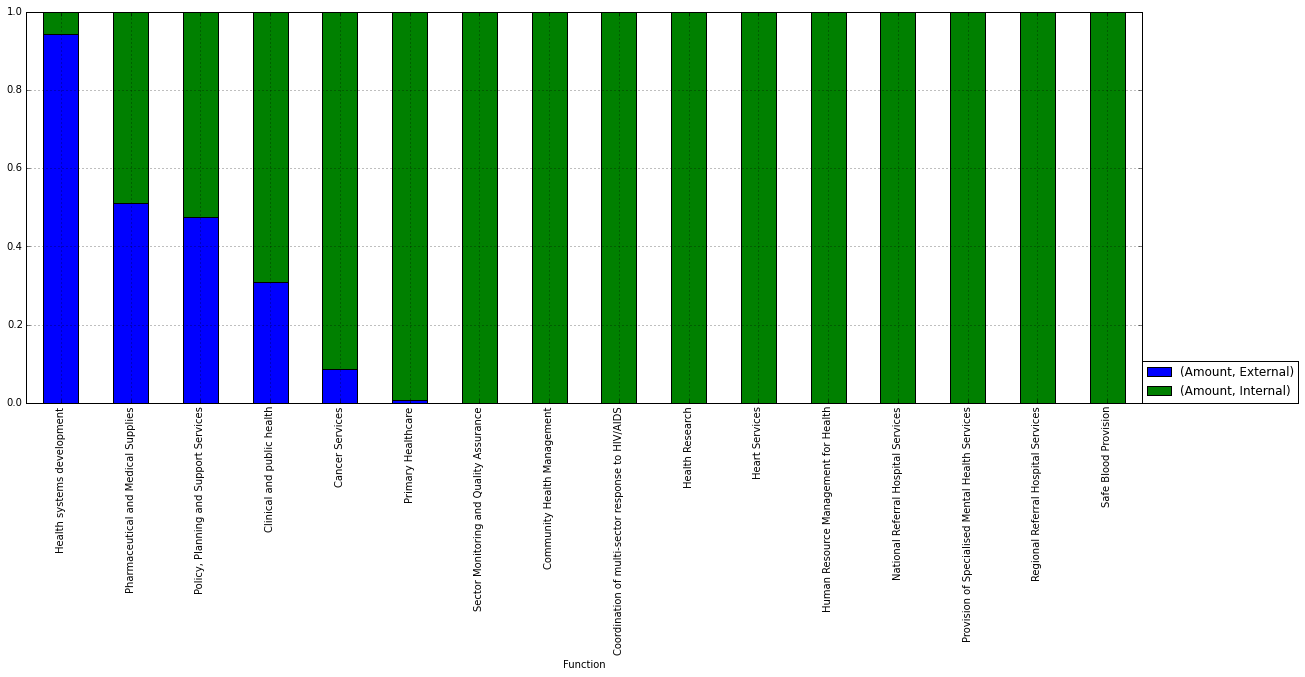

In [107]:
health_budget_fractions = (health_budget.groupby(['Function', 'Internal']).aggregate(np.sum) / health_budget.groupby(['Function']).aggregate(np.sum)).unstack().sort(columns=[("Amount", "External")], ascending=False)
plothbf = health_budget_fractions.plot(kind="bar", stacked=True, figsize=(20,7))
plothbf.legend(loc=(1,0))

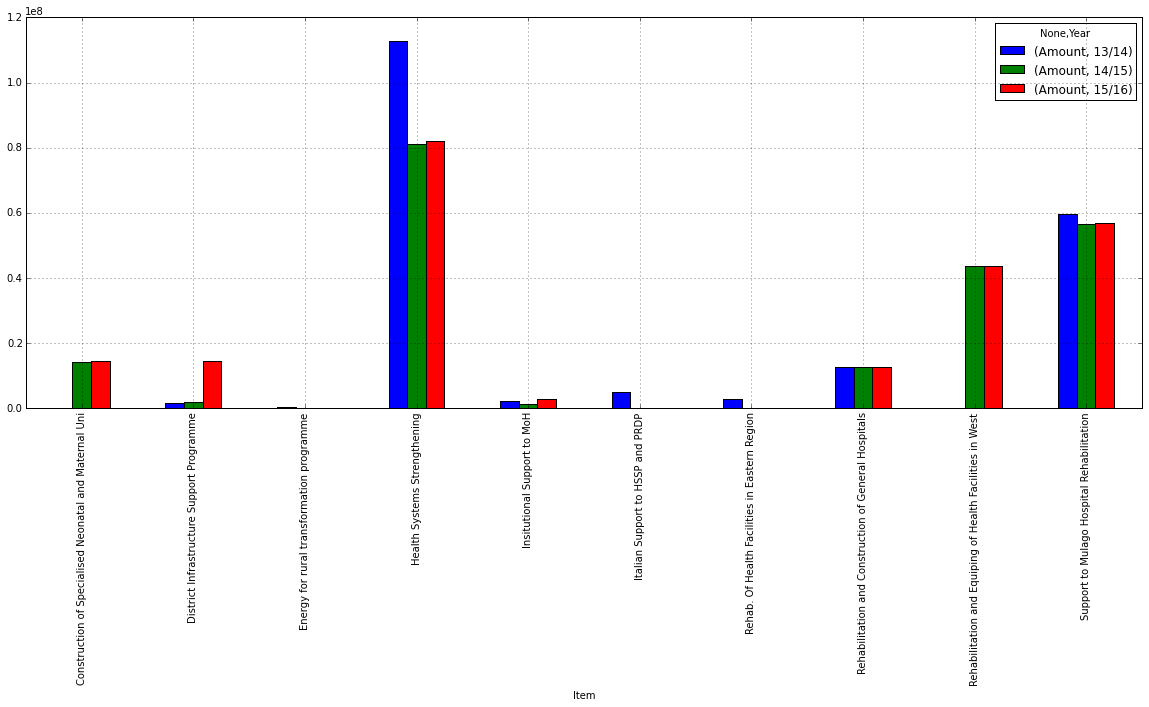

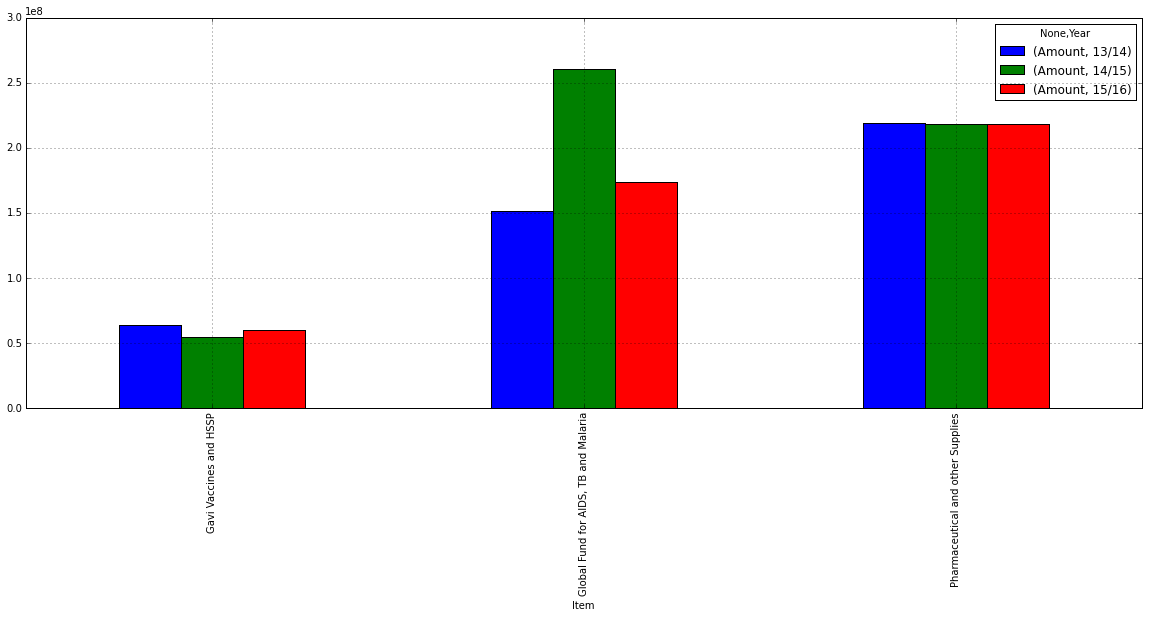

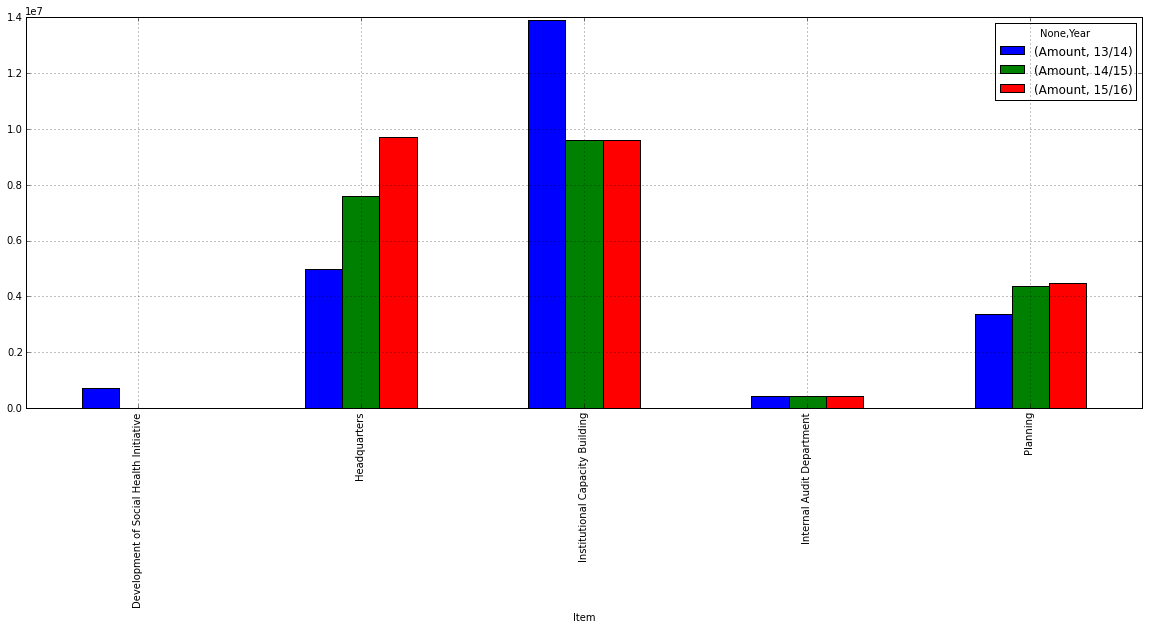

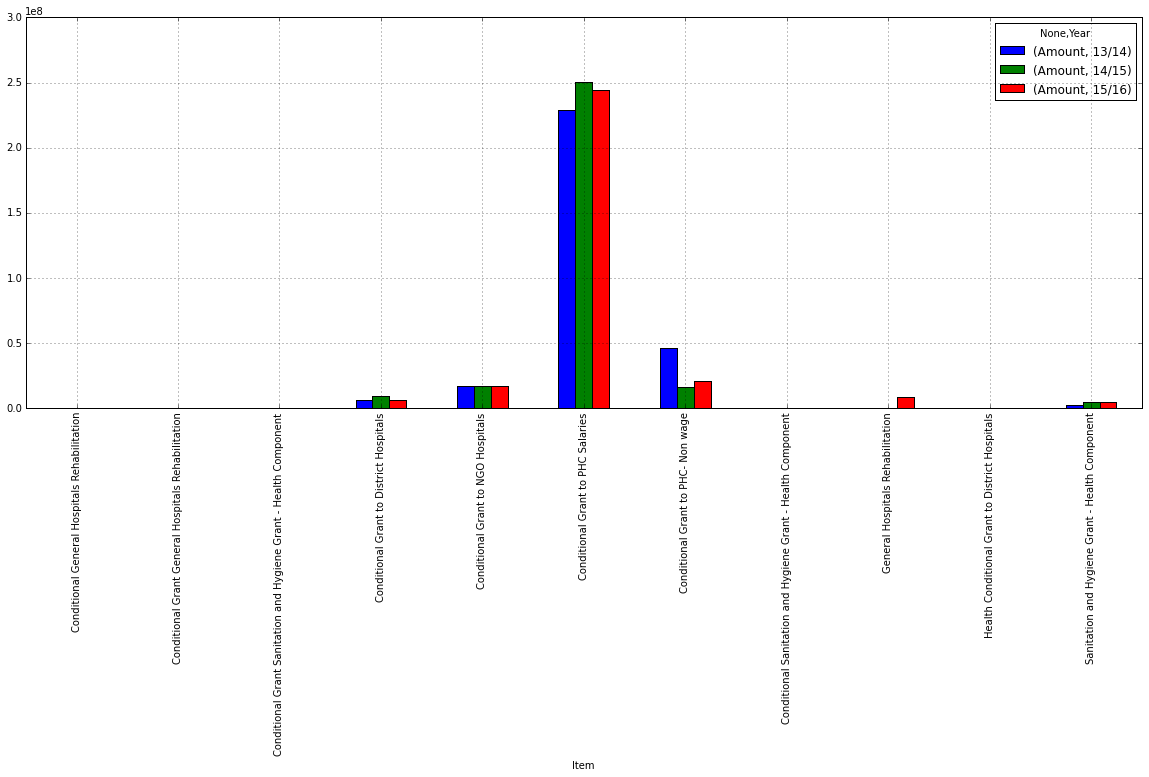

In [122]:
health_budget[health_budget['Function'] == "Policy, Planning and Support Services"].groupby(['Item','Year']).aggregate(np.sum).unstack().fillna(0).plot(kind="bar", figsize=(20,7))
health_budget[health_budget['Function'] == "Primary Healthcare"].groupby(['Item','Year']).aggregate(np.sum).unstack().fillna(0).plot(kind="bar", figsize=(20,7))

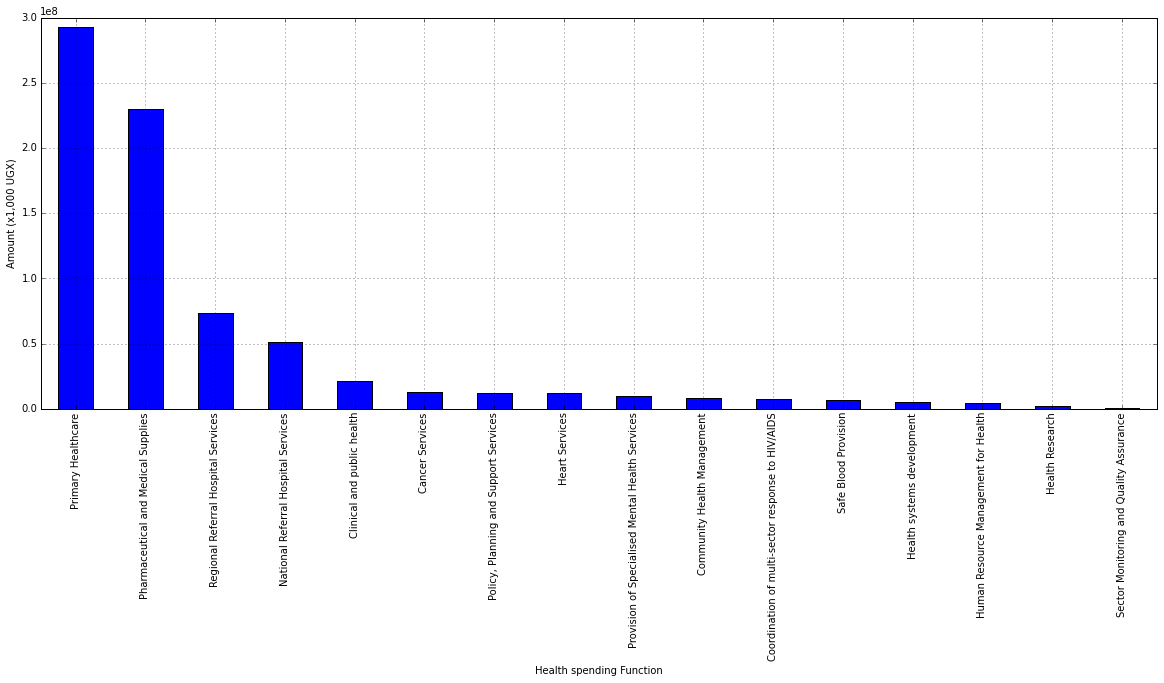

In [109]:
health_budget_internal = health_budget[(health_budget["Year"] == "14/15") & (health_budget["Internal"] == "Internal")].groupby("Function").aggregate(np.sum).sort(columns="Amount", ascending=False)
plothbi = health_budget_internal.plot(kind="bar", legend=None, figsize=(20,7))
plothbi.set_xlabel("Health spending Function")
plothbi.set_ylabel("Amount (x1,000 UGX)")

The most striking feature of the Ugandan Health budget, however, is the large proportion, as much as 90%, of the health spend which comes from non-Governmental sources. This amount is projected to decrease in the coming 2015/2016 year, however.

Part of this is due to a planned increase in domestic health spending by the Ugandan Government in the 2015/2016 financial year.

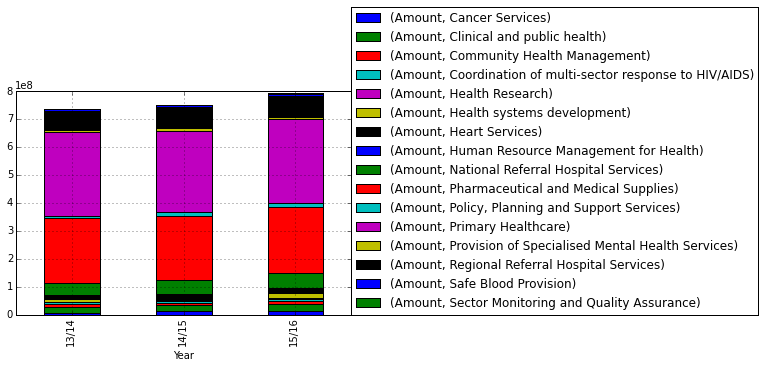

In [112]:
health_budget_internal_over_time = health_budget[health_budget["Internal"] == "Internal"][["Year", "Function", "Amount"]].groupby(["Year", "Function"]).aggregate(np.sum).unstack().fillna(0)
plothbit = health_budget_internal_over_time.plot(kind="bar", stacked=True)
plothbit.legend (loc=(1,0))

However, it is also partially due to a planned reduction in health expenditure in the country by non-Governmental sources, reducing towards the level of funding seen in the 2013/2014 year.

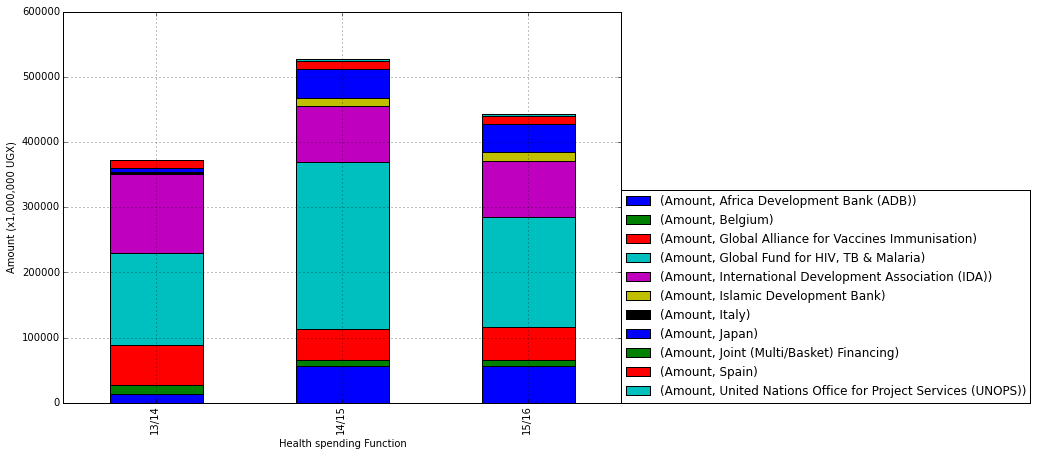

In [113]:
aid_funding_over_time = aid_funding[["Year", "Funder", "Amount"]].groupby(["Year", "Funder"]).aggregate(np.sum).unstack()
plotaid = aid_funding_over_time.plot(kind='bar', stacked=True, figsize=(10, 7))
plotaid.set_xlabel("Health spending Function")
plotaid.set_ylabel("Amount (x1,000,000 UGX)")
plotaid.legend(loc=(1, 0))